# Ejercicio Formativo 1 Capítulo 5

## Objetivo: Obtener la ruta de largo mínimo que va desde el extremo nororiente al surponiente de la comuna de Macul y que pasa por el centroide de esta

## Descargando Datos

In [ ]:
!unzip Data.zip

Archive:  Data.zip
   creating: Data/Areas Urbanas/
  inflating: Data/Areas Urbanas/areas_urbanas.dbf  
  inflating: Data/Areas Urbanas/areas_urbanas.prj  
  inflating: Data/Areas Urbanas/areas_urbanas.sbn  
  inflating: Data/Areas Urbanas/areas_urbanas.sbx  
  inflating: Data/Areas Urbanas/areas_urbanas.shp  
  inflating: Data/Areas Urbanas/areas_urbanas.shp.xml  
  inflating: Data/Areas Urbanas/areas_urbanas.shx  
  inflating: Data/Areas Urbanas/Disclaimer.txt  
   creating: Data/Distritos Censales/
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.prj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.qpj  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shp  
  inflating: Data/Distritos Censales/centroides Distritos Censales RM.shx  
  inflating: Data/Distritos Censales/Distritos Censales RM.dbf  
  inflating: Data/Distritos Censales/Distritos C

## Importando Librerías

In [ ]:
!pip install osmnx

In [ ]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

## Desarrollo

Se debe recordar que se pueden especificar diferentes tipos de redes con el argumento `network_type`, por ejemplo:

- `drive`: Obtiene todas las calles públicas.
- `drive_service`: Obtiene todas las calles públicas, incluyendo vías de servicio.
- `walk`: Obtiene todos los tramos, vias o calles donde pueden transitar peatones.
- `bike`: Obtiene todas las vías donde pueden transitar ciclistas.
- `all`: Descarga todos los tramos de acceso público.
- `all_private`: Descarga todos los tramos de acceso público, incluidas las vías privadas.

Para el contexto de este ejercicio como no nos especifican el medio de transporte que se puede utilizar por ende la red generada tendrá todos tramos de acceso público.

### 1. Descargue la red correspondiente a la comuna de Macul, utilizando la librería osmnx.

Obtenemos la red usando el método `graph_from_place`.

In [ ]:
G_Macul = ox.graph_from_place('Macul, Chile', network_type = 'all')

Graficamos la red usando el método `plot_graph`.

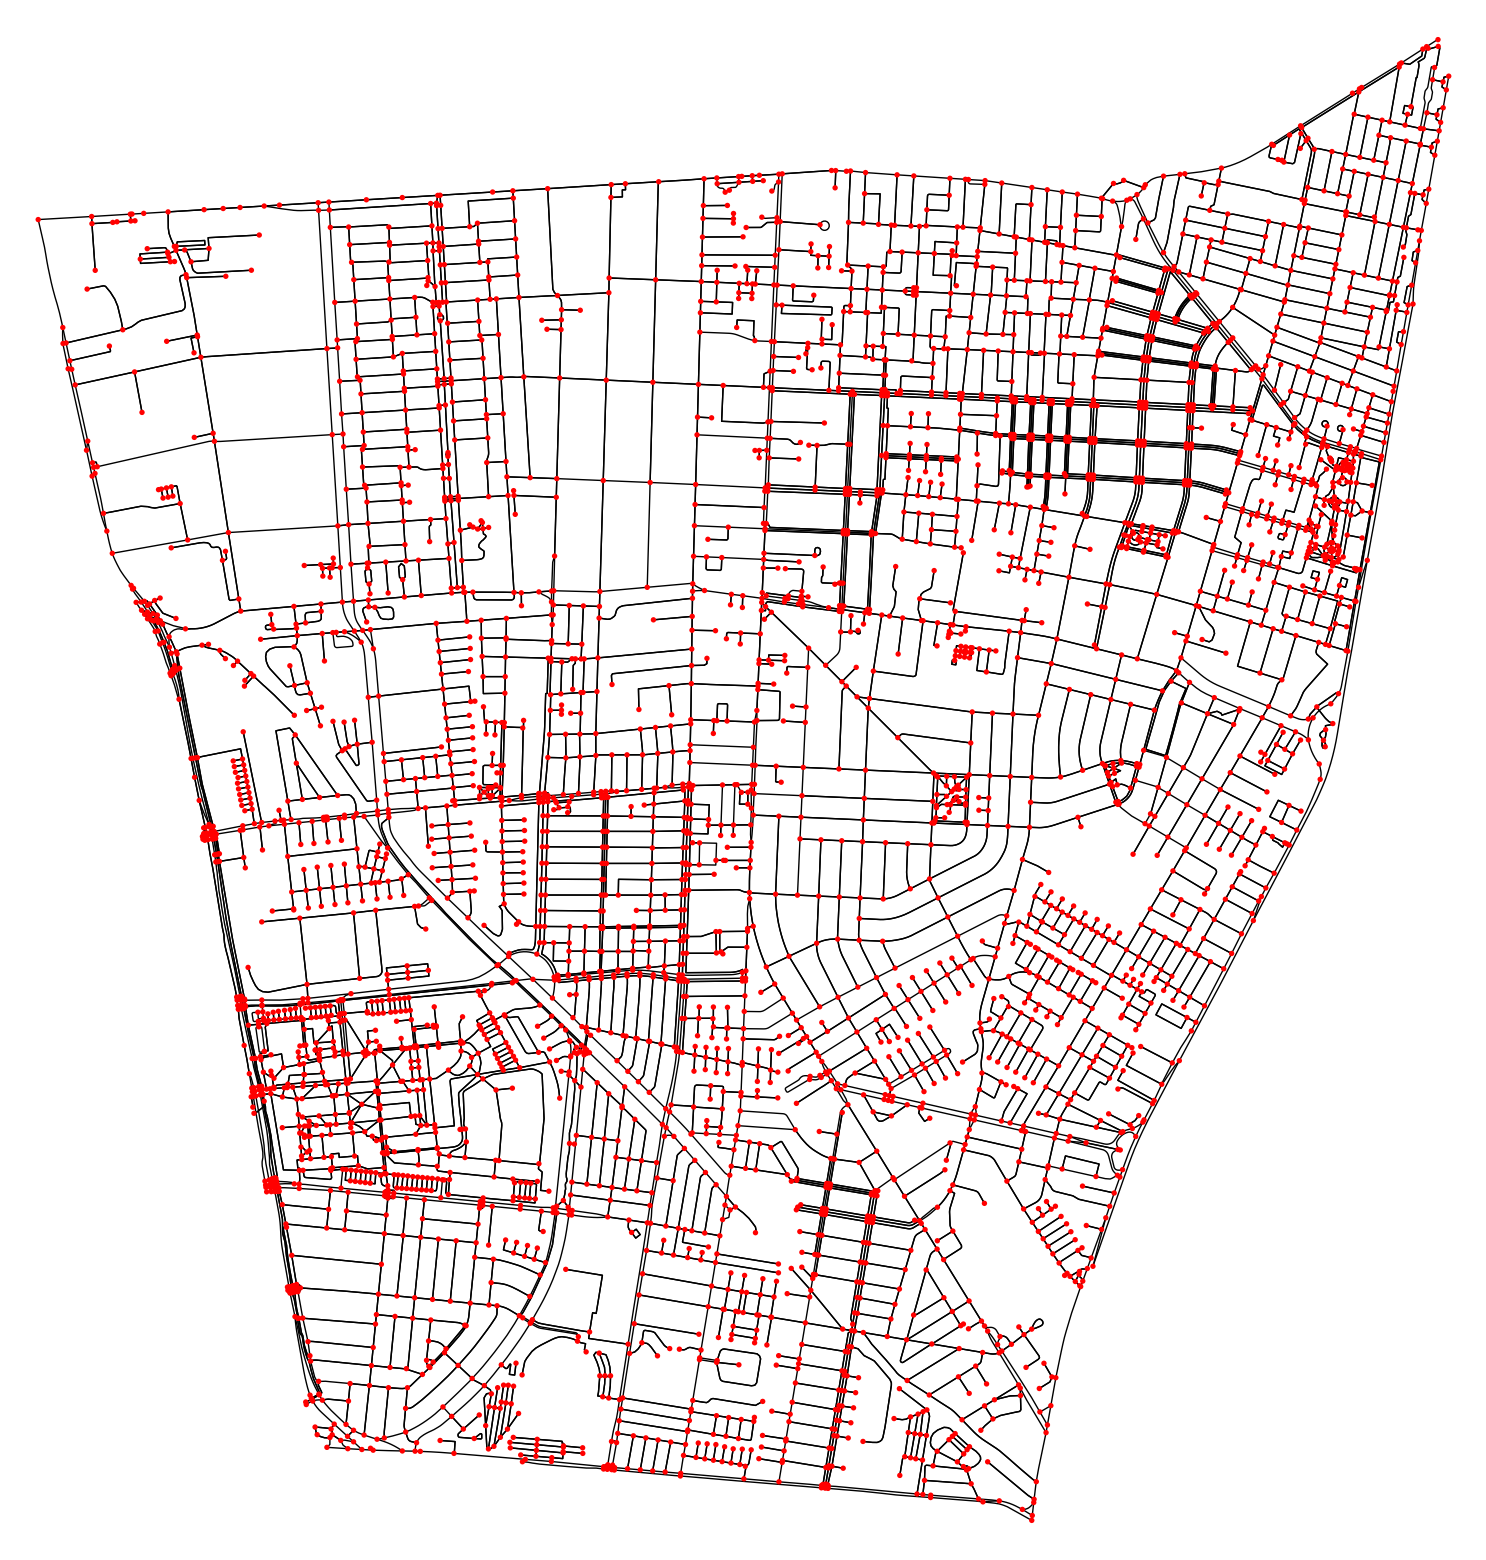

(<Figure size 2000x2000 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph(G_Macul, figsize=(20,20), bgcolor="w", node_color="red", edge_color="black")

### 2. Utilizando algún servicio web de mapas (por ejemplo, Google Maps), obtenga las coordenadas de los puntos extremos solicitados, cuidando que estos se encuentren dentro de la comuna.



In [ ]:
# Google Maps nos da las coordenadas en (lat, long)
Macul_Nororiente = (-33.471093, -70.578084)
Macul_Surponiente = (-33.506894, -70.612903)

### 3. Obtenga los nodos más cercanos a estas coordenadas, utilizando ox.distance.nearest nodes.

In [ ]:
orig_node = ox.distance.nearest_nodes(G_Macul, Macul_Nororiente[1], Macul_Nororiente[0])
dest_node = ox.distance.nearest_nodes(G_Macul, Macul_Surponiente[1], Macul_Surponiente[0])

### 4. Cargue ahora los archivos .shp correspondientes, utilizando la función read file de GeoPandas y obtenga el centroide de la comuna de Macul. Para esto, considere una de las siguientes opciones:

In [ ]:
distritos = gpd.read_file('Data/Distritos Censales/Distritos Censales RM.shp')
area_urbana = gpd.read_file('Data/Areas Urbanas/areas_urbanas.shp')

#### a) Opción básica: obtenga las coordenadas aproximadas desde un servicio web de mapas.


Un servicio de web mapas es por ejemplo el mismo Open Street Map, para acceder a este servicio también nos valdremos de osmnx

In [ ]:
macul_gdf = ox.geocode_to_gdf('Macul, Chile')

In [ ]:
macul_gdf.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-70.62303 -33.47494, -70.62063 -33.4...",-33.469933,-33.510417,-70.576651,-70.623029,1503491,relation,191190,-33.482163,-70.599193,boundary,administrative,16,0.423097,suburb,Macul,"Macul, Provincia de Santiago, Santiago Metropo..."


In [ ]:
macul_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
macul_gdf.to_crs("EPSG:32719", inplace=True)

In [ ]:
macul_centroide_4a = macul_gdf.geometry.centroid
print(macul_centroide_4a)

0    POINT (351365.507 6293319.077)
dtype: geometry


#### b) Opción media: obtenga el centroide del distrito censal más central de la comuna.

In [ ]:
santiago_urbano = area_urbana.loc[area_urbana["NOMBRE"]=="Santiago"]
distritos_urbanos = gpd.overlay(distritos, santiago_urbano, how="intersection")

In [ ]:
distritos_macul_urbano = distritos_urbanos.loc[distritos_urbanos["NOM_COM"]=="Macul"]

<Axes: >

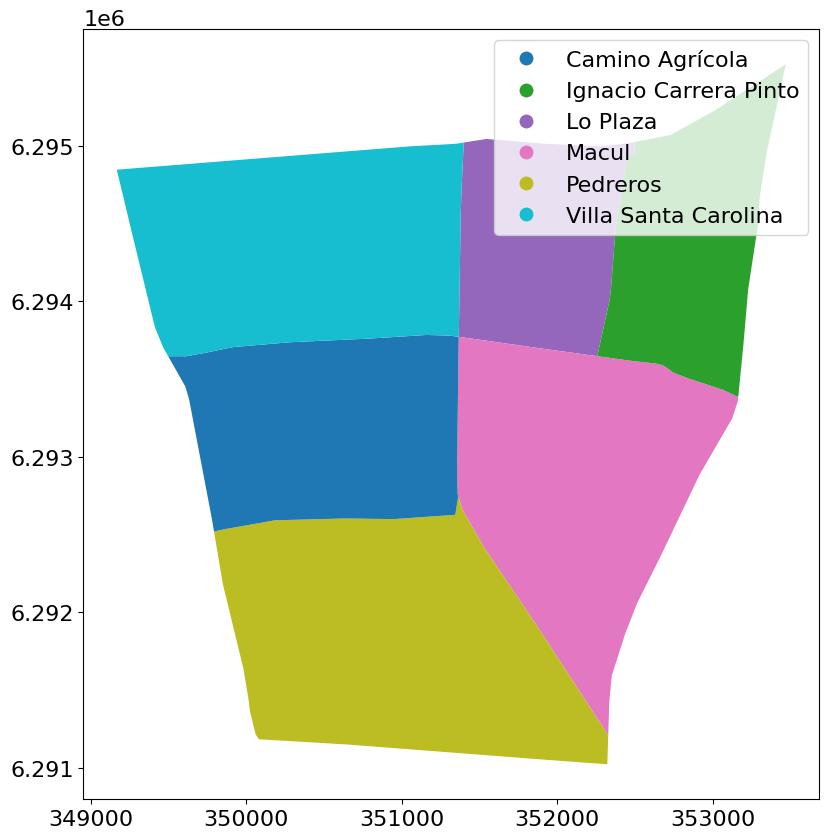

In [ ]:
distritos_macul_urbano.plot(column="NOM_DIS", legend=True)

In [ ]:
distrito_central_macul_urbano = distritos_macul_urbano.loc[distritos_macul_urbano["NOM_DIS"] == "Camino Agrícola"]

In [ ]:
macul_centroide_4b = distrito_central_macul_urbano.geometry.centroid
print(macul_centroide_4b)

175    POINT (350519.158 6293180.502)
dtype: geometry


#### c) Opción avanzada: utilice la función dissolve sobre los distritos censales para obtener los límites geográficos de las comunas, y luego a partir de estos el centroide correspondiente.

In [ ]:
comunas_urbanas = distritos_urbanos.dissolve(by="NOM_COM")

In [ ]:
comunas_urbanas.head(5)

,geometry,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area
NOM_COM,,,,,,,,,,,,,,,,,,,,
Cerrillos,"POLYGON ((342519.828 6294322.749, 342581.626 6...",Región Metropolitana De Santiago,131,Santiago,13102,Cerrillos,1310201.0,71.0,675.0,835.0,494.0,69.0,2144.0,8062397.85,2.66,2.58,Santiago,Ciudad,427491.444262,5.821041e+08
Cerro Navia,"POLYGON ((339965.479 6299018.786, 339951.023 6...",Región Metropolitana De Santiago,131,Santiago,13103,Cerro Navia,1310301.0,765.0,3370.0,1674.0,319.0,13.0,6141.0,1782987.73,34.44,2.89,Santiago,Ciudad,427491.444262,5.821041e+08
Colina,"POLYGON ((339773.895 6311887.757, 339242.626 6...",Región Metropolitana De Santiago,133,Chacabuco,13301,Algarrobal,1330103.0,286.0,656.0,746.0,332.0,89.0,2109.0,39793208.00,0.53,0.79,Santiago,Ciudad,427491.444262,5.821041e+08
Conchalí,"POLYGON ((343573.523 6302738.591, 343231.294 6...",Región Metropolitana De Santiago,131,Santiago,13104,Conchalí,1310401.0,104.0,1133.0,963.0,425.0,28.0,2653.0,835799.10,31.74,5.40,Santiago,Ciudad,427491.444262,5.821041e+08
El Bosque,"POLYGON ((345308.935 6282646.503, 344414.772 6...",Región Metropolitana De Santiago,131,Santiago,13105,El Bosque,1310501.0,267.0,1944.0,1587.0,681.0,43.0,4522.0,4310150.84,10.49,3.71,Santiago,Ciudad,427491.444262,5.821041e+08


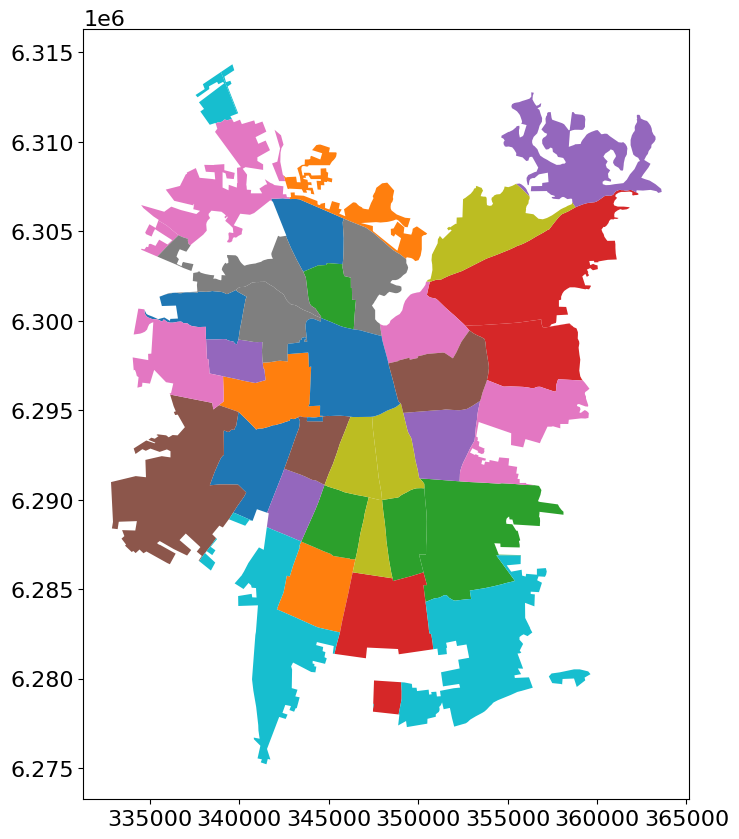

In [ ]:
comunas_urbanas.plot(figsize = (10,10), column = 'COD_COM');

In [ ]:
macul_comuna_urbana = comunas_urbanas.loc["Macul"]

In [ ]:
print(macul_comuna_urbana)

geometry      POLYGON ((352289.0342592057 6291025.604355423,...
NOM_REG                        Región Metropolitana De Santiago
COD_PROV                                                    131
NOM_PROV                                               Santiago
COD_COM                                                   13118
NOM_DIS                                                Lo Plaza
CODIGO                                                1311801.0
E                                                         187.0
D                                                        1310.0
C3                                                       1643.0
C2                                                        936.0
ABC1                                                      172.0
ADIMARK_T                                                4248.0
Area                                                 1304277.83
Densidad                                                  32.57
1_UF_M2                                 

In [ ]:
print(macul_comuna_urbana.geometry.centroid)

POINT (351328.70602219756 6293285.619735862)


### 5. En caso de ser necesario, proyecte los centroides al CRS utilizado por la red de Macul descargada con osmnx.

In [ ]:
comunas_urbanas.to_crs("EPSG:4326", inplace=True)

In [ ]:
macul_comuna_urbana = comunas_urbanas.loc["Macul"]

In [ ]:
macul_centroide_4c_proyectado = macul_comuna_urbana.geometry.centroid
print(macul_centroide_4c_proyectado)

POINT (-70.60031602972468 -33.489621938440166)


### 6. Obtenga el nodo más cercano al centroide de Macul.

In [ ]:
nodo_macul_centroide = ox.distance.nearest_nodes(G_Macul, macul_centroide_4c_proyectado.x, macul_centroide_4c_proyectado.y)

### 7. Calcule las rutas óptimas entre los puntos extremos y el centroide

In [ ]:
ruta_macul_nororiente_centroide = nx.shortest_path(G_Macul, orig_node, nodo_macul_centroide, weight = 'length')
ruta_macul_surponiente_centroide = nx.shortest_path(G_Macul, nodo_macul_centroide, dest_node, weight = 'length')

### 8. Grafique la ruta final e imprima su largo.

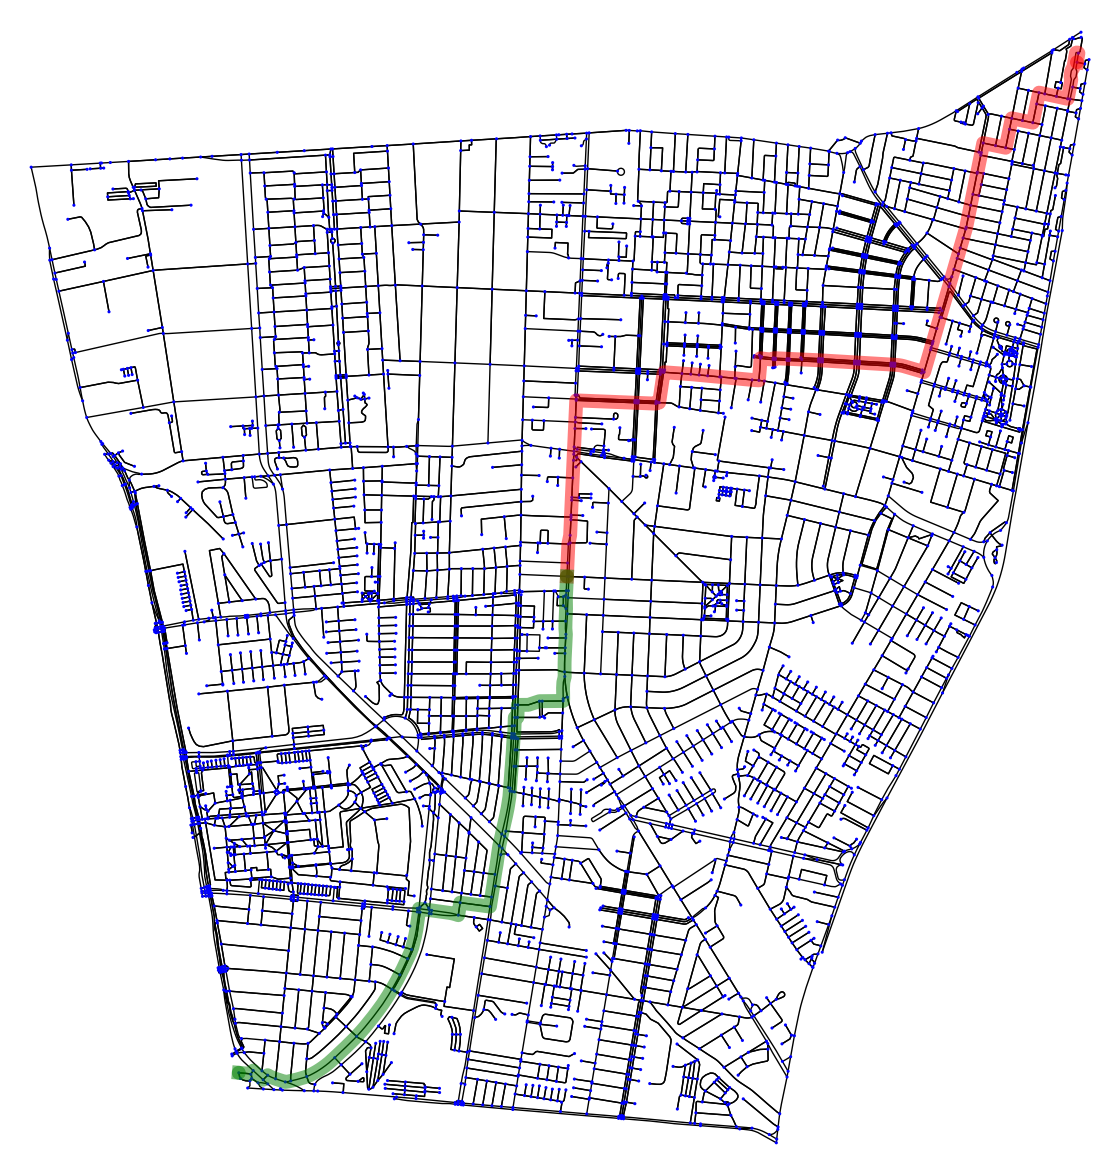

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [ ]:
ruta_final = [ruta_macul_nororiente_centroide, ruta_macul_surponiente_centroide]
ox.plot_graph_routes(G_Macul, ruta_final, node_size = 5, figsize=(15,15), route_colors=["r", "g"], bgcolor = 'w', node_color = 'blue', edge_color = 'black', route_linewidths=10)

In [ ]:
largo_ruta_macul_nororiente_centroide = nx.shortest_path_length(G_Macul, orig_node, nodo_macul_centroide, weight = 'length')
largo_ruta_macul_surponiente_centroide = nx.shortest_path_length(G_Macul, nodo_macul_centroide, dest_node, weight = 'length')
print(f"El largo de la ruta que pasa por el centroide es: {largo_ruta_macul_nororiente_centroide + largo_ruta_macul_surponiente_centroide}")

El largo de la ruta que pasa por el centroide es: 6939.530000000001


### 9. Compare esta ruta y su largo con la ruta óptima que une ambos puntos extremos.

In [ ]:
ruta_optima_nororiente_surponiente = nx.shortest_path(G_Macul, orig_node, dest_node, weight = 'length')

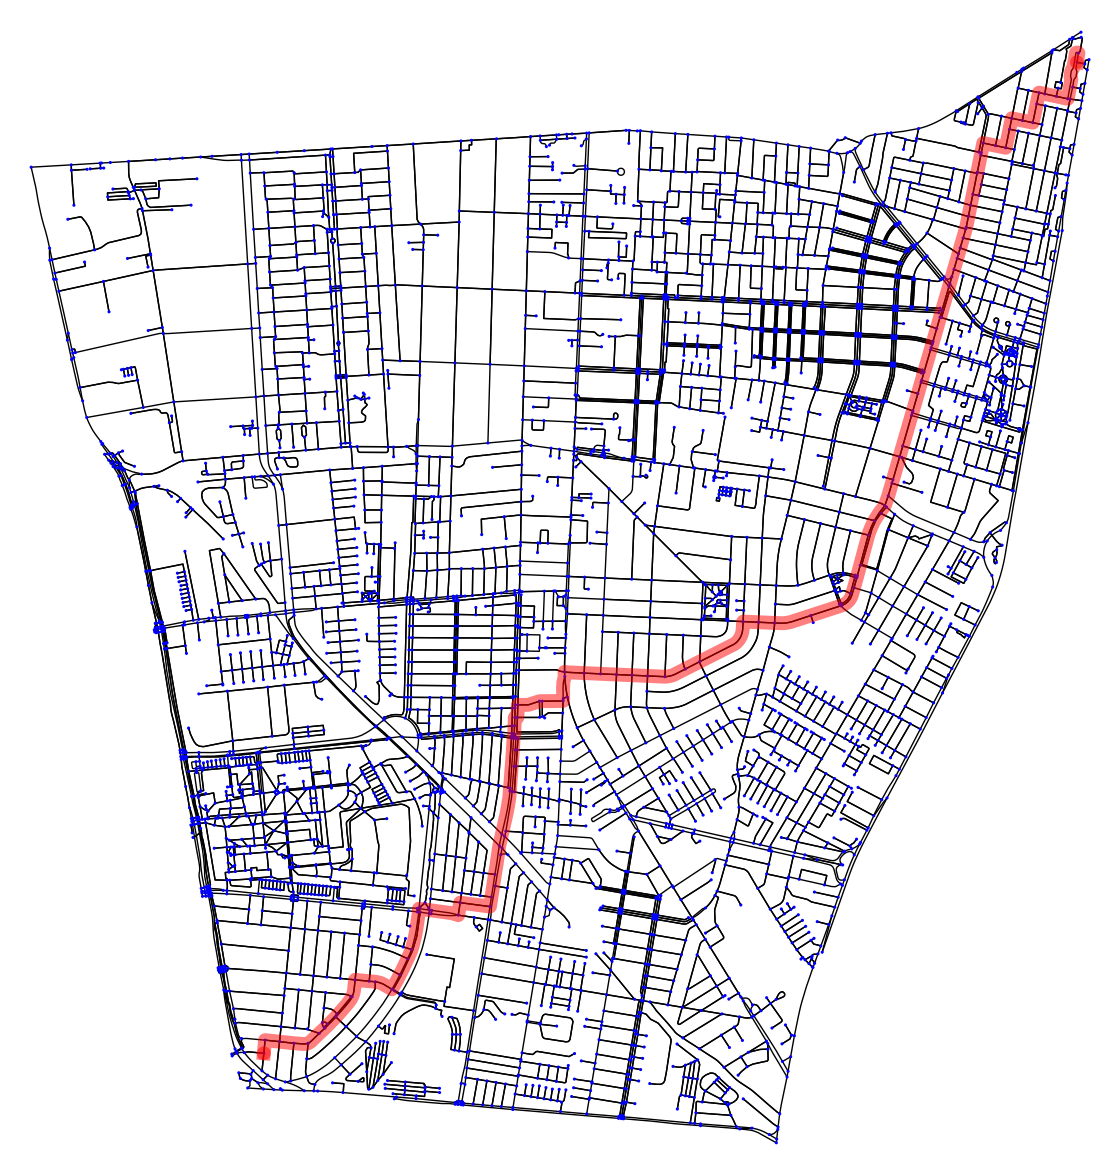

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [ ]:
ox.plot_graph_route(G_Macul, ruta_optima_nororiente_surponiente, node_size = 5, figsize=(15,15), bgcolor = 'w', node_color = 'blue', edge_color = 'black', route_linewidth=10)

In [ ]:
largo_ruta_optima_nororiente_surponiente = nx.shortest_path_length(G_Macul, orig_node, dest_node, weight = 'length')
print(f"El largo de la ruta óptima es: {largo_ruta_optima_nororiente_surponiente}")

El largo de la ruta óptima es: 6474.576
